

*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import necessary libraries.



In [2]:
# load/import all required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution

train_path = '/content/drive/MyDrive/Python/train.csv'
test_path = '/content/drive/MyDrive/Python/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


In [4]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,47472,Female,58,0,0,Yes,Private,Urban,107.26,38.6,formerly smoked
1,36841,Male,78,1,0,Yes,Self-employed,Rural,56.11,25.5,formerly smoked
2,3135,Female,73,0,0,No,Self-employed,Rural,69.35,NaN,never smoked
3,65218,Male,2,0,0,No,children,Rural,109.10,20.0,Unknown
4,1847,Female,20,0,0,No,Govt_job,Rural,79.53,NaN,never smoked


In [5]:
train.shape

(1137, 12)

In [6]:
test.shape

(932, 11)

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [7]:
# write task-2 solution

train_missing_values=train.isnull().sum()
train_missing_values

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [8]:
test_missing_values=test.isnull().sum()
test_missing_values

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  57
smoking_status        0
dtype: int64

In [9]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (1085, 12)
test data shape: (875, 11)


:•	**Task 3:** Draw graphs to analyze the frequency distributions of the
features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

In [10]:
# write task-3 solution

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


In [11]:
def histogram(column):
  plt.viridis()
  plt.figure(figsize=(15, 20))

  for index, col in enumerate(column):
    plt.subplot((len(column) + 1) // 2, 2, index + 1)
    plt.hist(train[col],bins=10, color='green',edgecolor='black',density=True,alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y',linestyle='--', alpha=0.7)

    # Display the plot
  plt.tight_layout(pad = 2)

  plt.show()

<Figure size 640x480 with 0 Axes>

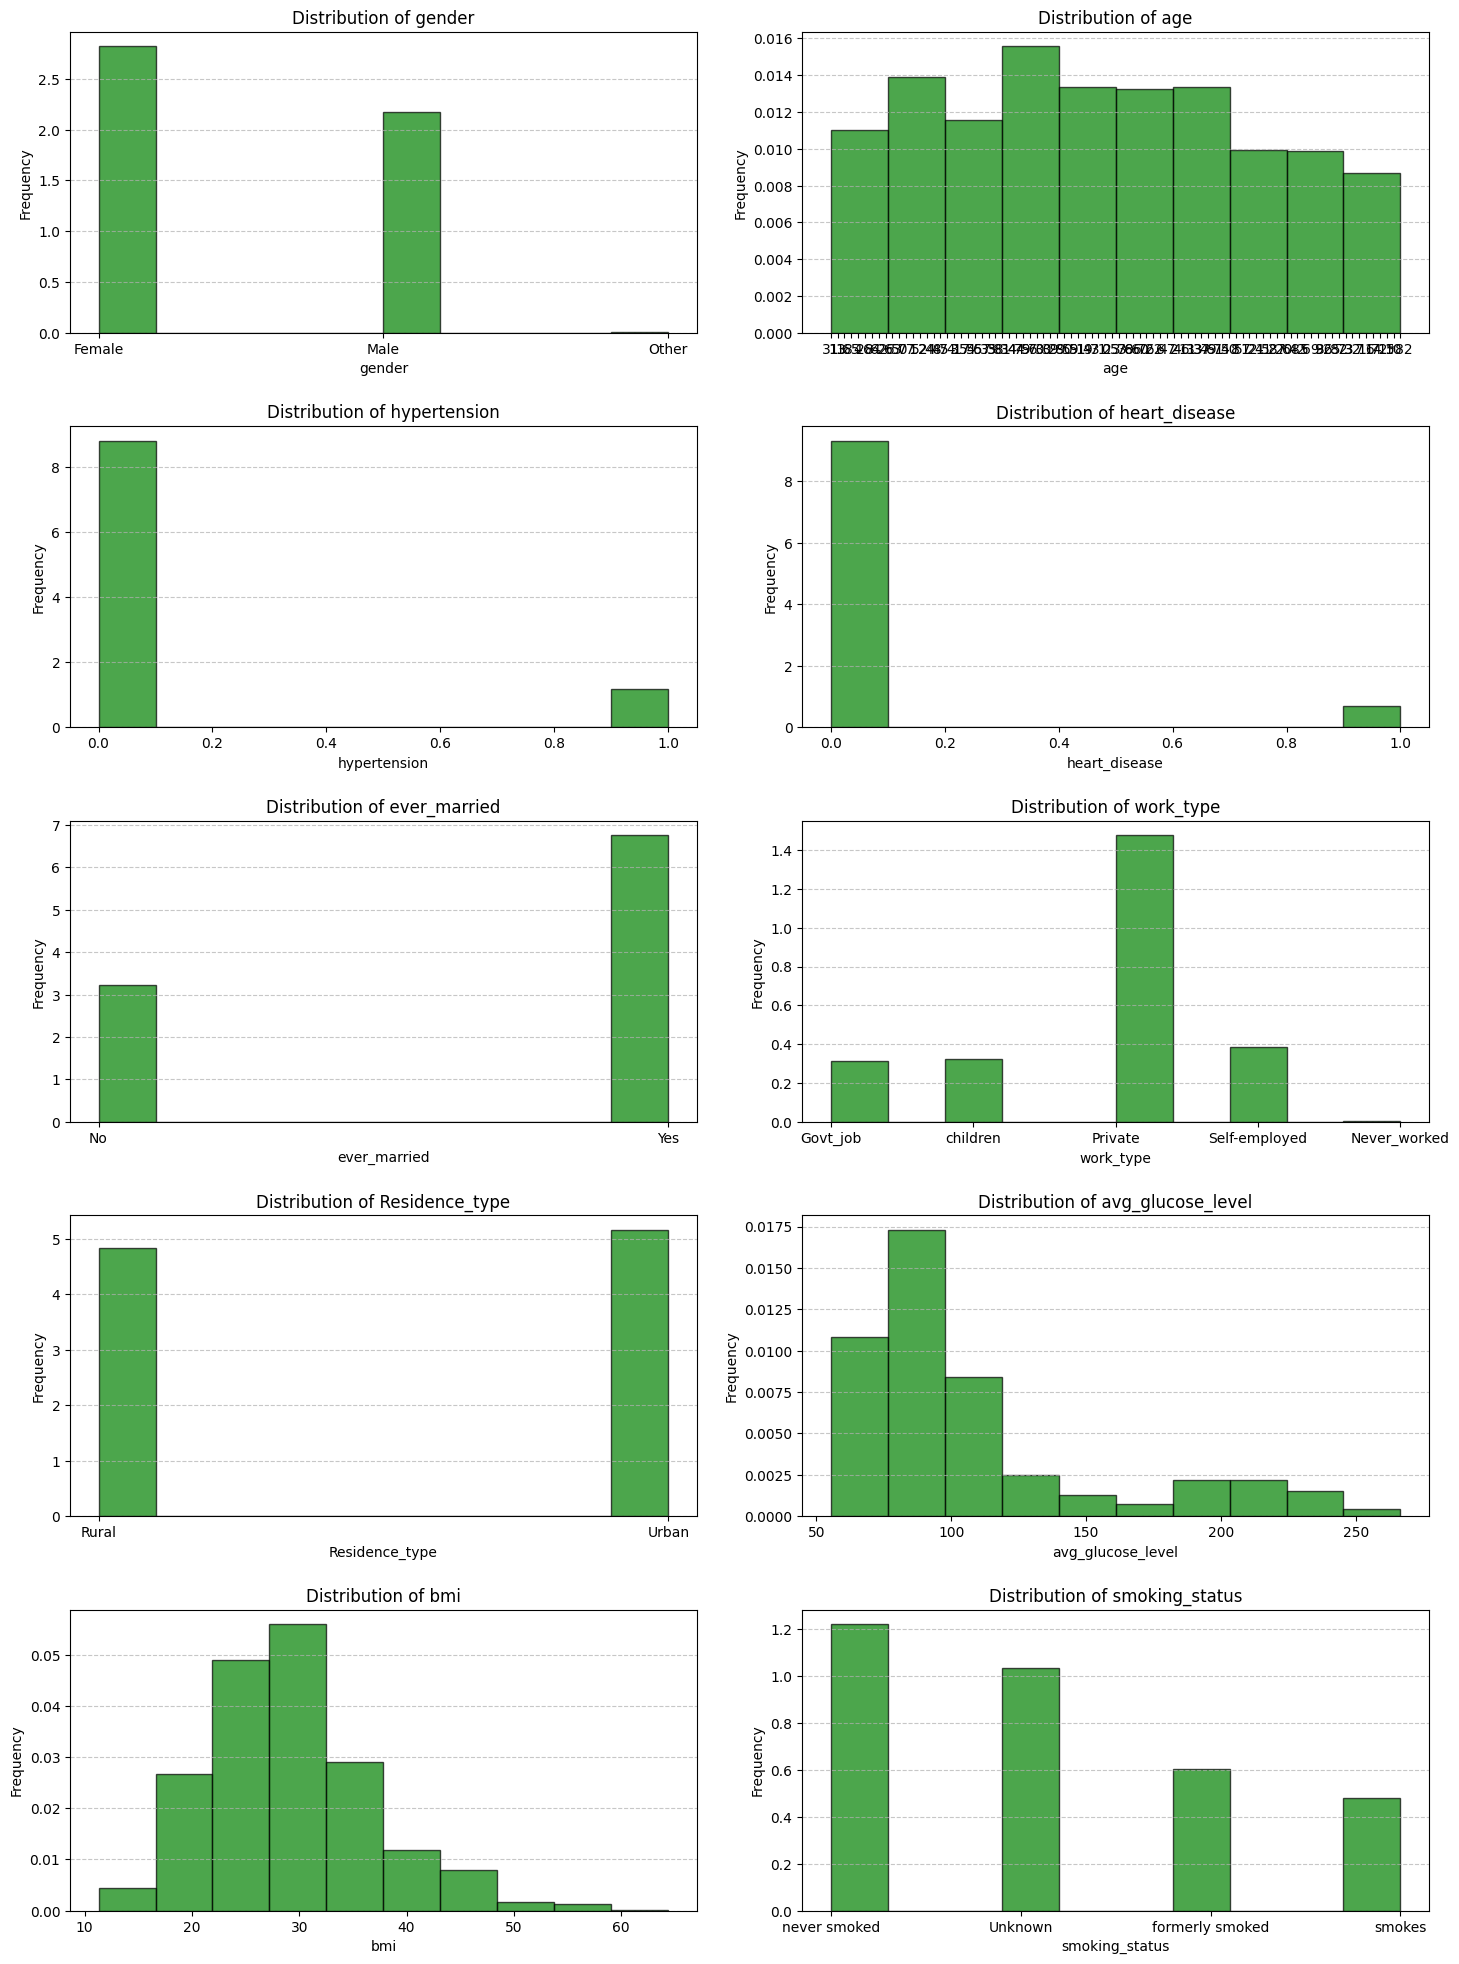

In [12]:
x = train.columns.tolist()[1:-1]
histogram(x)

•	**Task 4:** Draw graphs to illustrate if there is any relationship between
target column to any other columns of the dataset. Use Matplotlib library to
complete this task. Also use sublot() function to show all plots in one figure.




In [13]:
# # prompt: Draw graphs to illustrate if there is any relationship between  target column to any other columns of the dataset. Use Matplotlib library to  complete this task. Also use sublot() function to show all plots in one figure.

# plt.figure(figsize=(15, 15))
# sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
# plt.show()


In [14]:
# write task-4 solution

def price_scatter_plot(x_axis, column_name):

    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot

        # sns.scatterplot(x = x_axis, y = col, data = data)
        plt.scatter(train[x_axis], train[col],alpha=0.5, color='b', edgecolors='k')

        plt.title(f'{col.upper()} vs. STROKE', fontsize=18)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('STROKE', fontsize=14)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

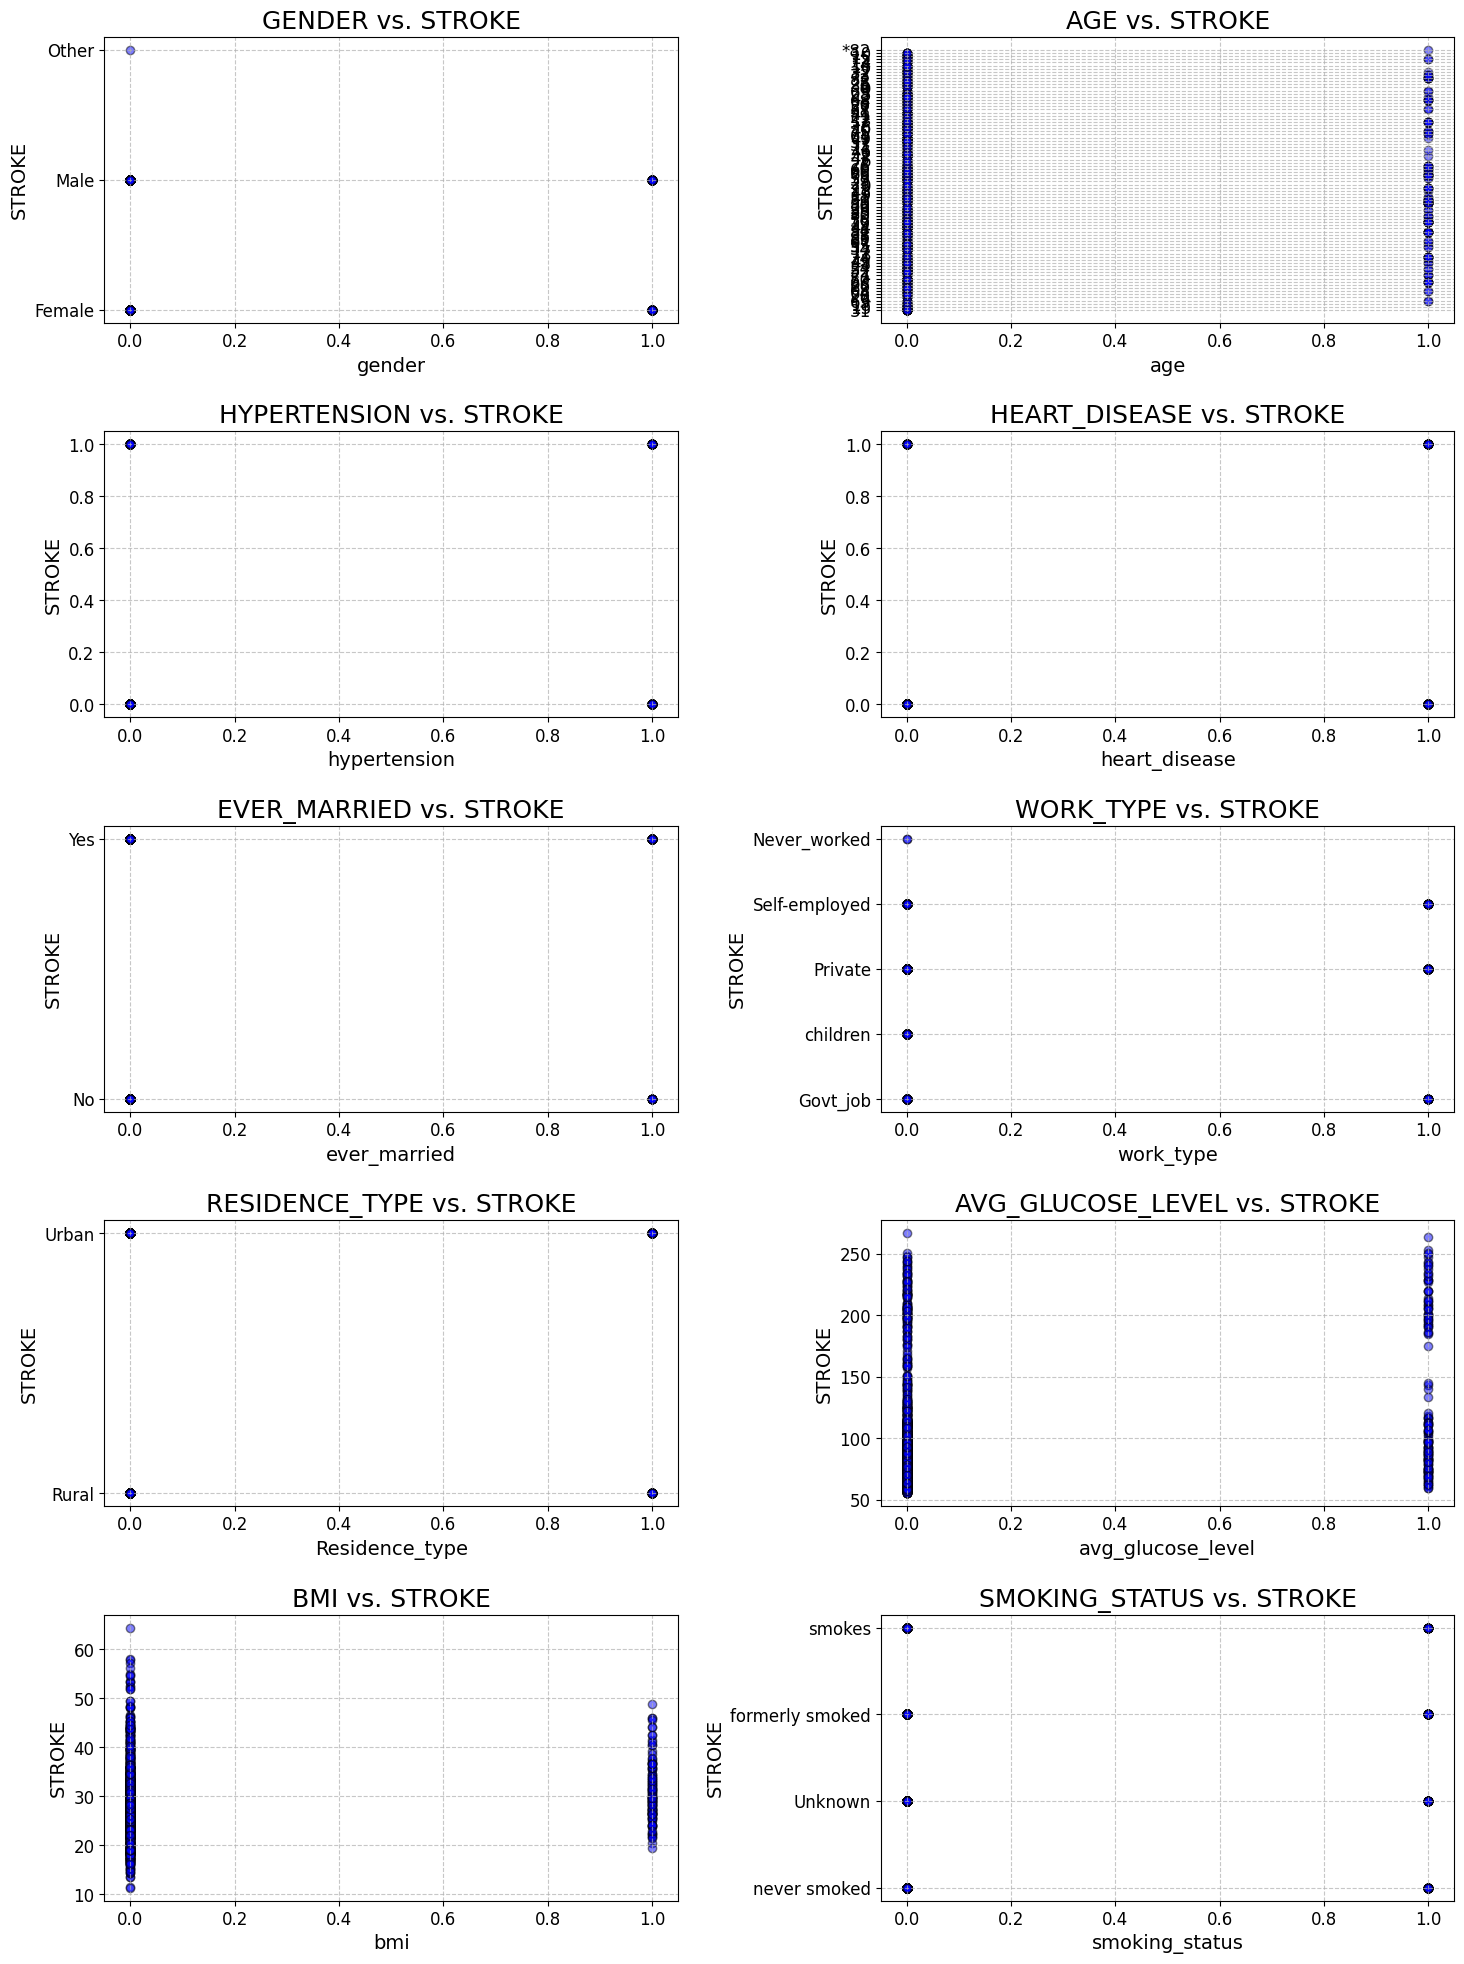

In [15]:
columns = train.columns.to_list()[1:-1]
price_scatter_plot("stroke",columns)

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [16]:
# write task-5 solution

str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])

In [17]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,age,ever_married,work_type,Residence_type,smoking_status,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,26,0,0,0,2,1192,0,0,70.66,27.2,0
1,0,6,0,4,0,0,77,0,0,85.81,18.6,0
2,1,11,0,2,1,2,59200,0,0,60.56,33.0,0
3,0,63,1,2,1,1,24905,0,0,205.77,46.0,1
4,1,35,0,4,0,0,24257,0,0,90.42,16.2,0


In [18]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,age,ever_married,work_type,Residence_type,smoking_status,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,26,0,0,0,2,1192,0,0,70.66,27.2,0
1,0,6,0,4,0,0,77,0,0,85.81,18.6,0
2,1,11,0,2,1,2,59200,0,0,60.56,33.0,0
3,0,63,1,2,1,1,24905,0,0,205.77,46.0,1
4,1,35,0,4,0,0,24257,0,0,90.42,16.2,0


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [19]:
# write task-6 solution

xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(1085, 11)

In [20]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(1085,)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)
x_test.shape


(272, 11)

In [22]:
y_test.shape

(272,)

In [23]:
x_train.head()


,gender,age,ever_married,work_type,Residence_type,smoking_status,id,hypertension,heart_disease,avg_glucose_level,bmi
421,0,17,1,2,0,2,29014,0,0,77.73,19.2
898,0,36,1,2,0,3,69089,0,0,83.30,32.0
962,0,9,0,2,0,1,11803,0,0,95.38,34.3
684,0,61,1,2,1,0,15525,0,0,96.26,31.8
394,1,48,0,3,0,1,72011,0,0,87.15,26.4


In [24]:
y_train.head()

421    0
898    0
962    0
684    0
394    0
Name: stroke, dtype: int64

In [25]:
x_test.head()

,gender,age,ever_married,work_type,Residence_type,smoking_status,id,hypertension,heart_disease,avg_glucose_level,bmi
622,0,81,1,2,0,2,32729,0,0,184.40,27.5
758,1,82,1,0,1,1,37132,0,0,200.59,29.0
788,1,78,1,2,0,2,10119,0,0,69.34,29.0
804,1,36,1,2,0,0,72450,0,0,88.81,32.7
151,0,20,0,2,0,3,27145,0,0,89.30,48.4


In [26]:
y_test.head()

622    1
758    1
788    0
804    0
151    0
Name: stroke, dtype: int64

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [27]:
# write task-7 solution

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [28]:
predict=model.predict(x_test)
predict

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

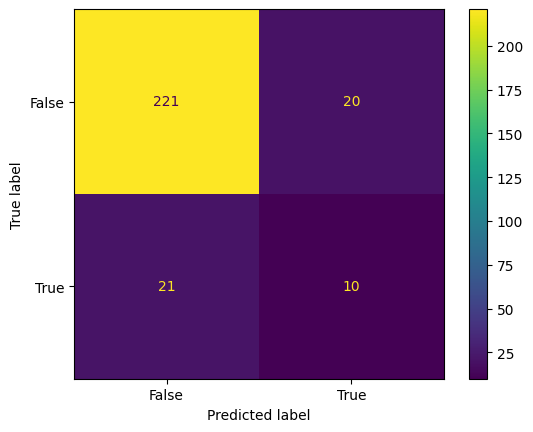

In [29]:
# write task-8 solution
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, recall_score,precision_score,f1_score
confusionMatrix = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])

cm_display.plot()
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [30]:
# write task-9 solution

test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.8492647058823529


In [33]:
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='macro')
recall = recall_score(y_test,predict)
f1 = f1_score(y_test, predict, average='macro')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8492647058823529
Precision: 0.6232782369146005
Recall: 0.3225806451612903
F1-score: 0.6214913620473136


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [32]:
# write task-10 solution

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=10,scoring='accuracy').mean()
print(f"Cross validation accuracy: {scores}")


Cross validation accuracy: 0.8720867208672086
